# Homework 1
2023-11265 문승현 \
2024.03.05

## Problem 4

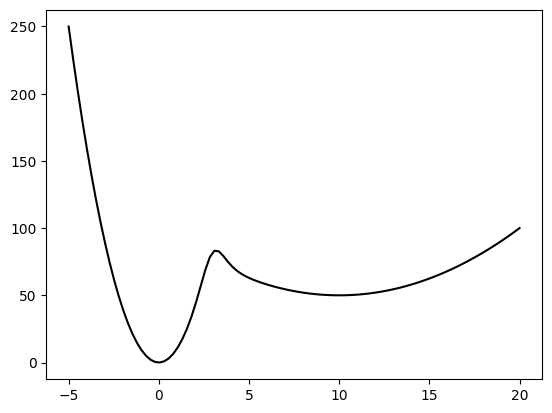

In [1]:
# wideMinima.py
import numpy as np
import matplotlib.pyplot as plt


np.seterr(invalid='ignore', over='ignore')  # suppress warning caused by division by inf

def f(x):
  return 1/(1 + np.exp(3*(x-3))) * 10 * x**2  + 1 / (1 + np.exp(-3*(x-3))) * (0.5*(x-10)**2 + 50)

def fprime(x):
  return 1 / (1 + np.exp((-3)*(x-3))) * (x-10) + 1/(1 + np.exp(3*(x-3))) * 20 * x + (3* np.exp(9))/(np.exp(9-1.5*x) + np.exp(1.5*x))**2 * ((0.5*(x-10)**2 + 50) - 10 * x**2) 

x = np.linspace(-5,20,100)
plt.plot(x,f(x), 'k')
plt.show()

In [2]:
F = f
FPRIME = fprime
CONVERGE_CHECK_LENGTH = 100

def GD(x0, alpha, iter):
  x = x0
  for _ in range(iter):
    x = x - alpha * FPRIME(x)
  val = x
  for _ in range(CONVERGE_CHECK_LENGTH):
    val = val - alpha * FPRIME(val) 
    if abs(val - x) > 1e-3:
      return x, False # Not converged
  return x, True# Converged

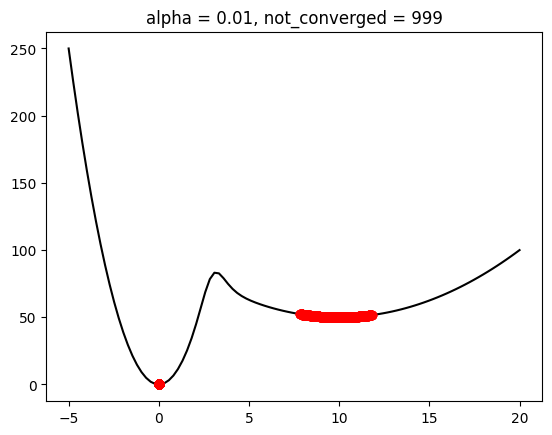

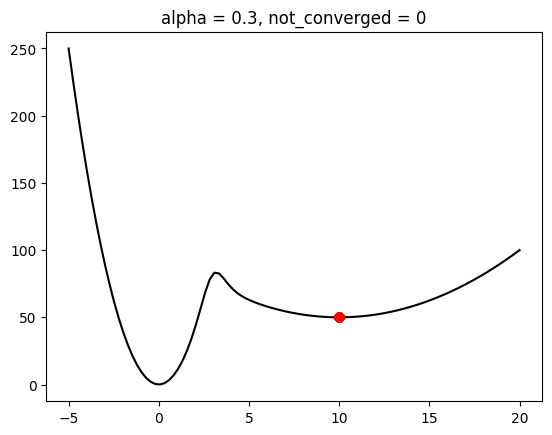

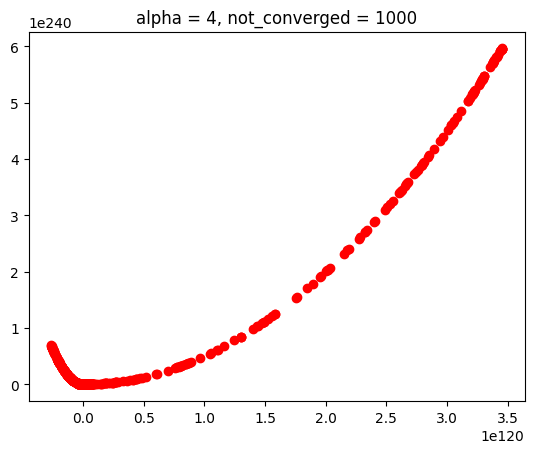

In [9]:
# For 100 iterations
# alpha = 0.01 : converges to either of the minimas (wide minima did not get converged enough)
# alpha = 0.3 : converges to wide minima
# alpha = 4 : doesn't converge to any minima

for alpha in [0.01, 0.3, 4]:
  x = np.linspace(-5,20,100)
  plt.plot(x,f(x), 'k')
  not_converged = 0
  for _ in range(1000):
    x0 = np.random.rand() * 20 - 5
    x, converged = GD(x0, alpha, 100)
    plt.plot(x, f(x), 'ro')
    if not converged or x < 0 or x > 20: not_converged += 1
  plt.title('alpha = {}, not_converged = {}'.format(alpha, not_converged))
  plt.show()

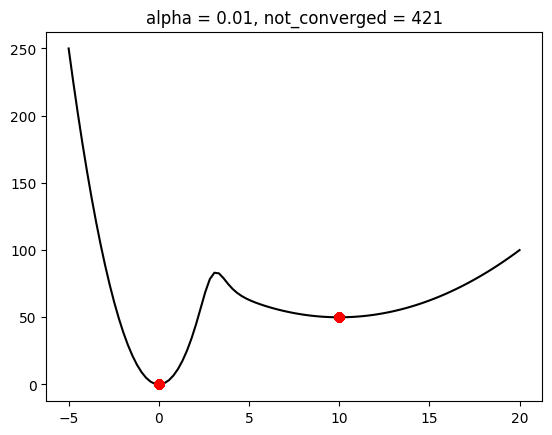

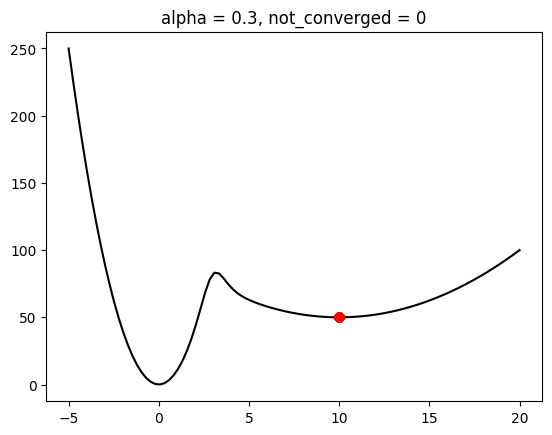

In [10]:
# For 1000 iterations
# alpha = 0.01 : converges to either of the minima (wide minima did get converged enough)
# alpha = 0.3 : converges to wide minima

for alpha in [0.01, 0.3]:
  x = np.linspace(-5,20,100)
  plt.plot(x,f(x), 'k')
  not_converged = 0
  for _ in range(1000):
    x0 = np.random.rand() * 20 - 5
    x, converged = GD(x0, alpha, 1000)
    plt.plot(x, f(x), 'ro')
    if not converged or x < 0 or x > 20: not_converged += 1
  plt.title('alpha = {}, not_converged = {}'.format(alpha, not_converged))
  plt.show()

## Problem 5

In [27]:
# conv1D.py
import numpy as np

class Convolution1d :
    def __init__(self, filt) :
        self.__filt = filt
        self.__r = filt.size
        self.T = TransposedConvolution1d(self.__filt)

    def __matmul__(self, vector) :
        r, n = self.__r, vector.size
        dim = n-r+1
        return np.array([
            self.__filt @ vector[i:i+r]
            for i in range(dim)
        ]) # IMPLEMENT THIS
    
class TransposedConvolution1d :
#Transpose of 1-dimensional convolution operator used for the 
#transpose-convolution operation A.T@(...)
    def __init__(self, filt) :
        self.__filt = filt
        self.__r = filt.size

    def __matmul__(self, vector) :
        r = self.__r
        n = vector.size + r - 1
        dim = n
        return np.array([  
            self.__filt[max(0,i+r-n):min(i, r-1)+1] @ np.flip(vector)[max(0,n-i-r):min(n-i,n-r+1)]
            for i in range(dim)
        ])  # IMPLEMENT THIS

def huber_loss(x) :
    return np.sum( (1/2)*(x**2)*(np.abs(x)<=1) + (np.sign(x)*x-1/2)*(np.abs(x)>1) )
def huber_grad(x) :
    return x*(np.abs(x)<=1) + np.sign(x)*(np.abs(x)>1)


r, n, lam = 3, 20, 0.1

np.random.seed(0)
k = np.random.randn(r)
b = np.random.randn(n-r+1)
A = Convolution1d(k)
# from scipy.linalg import circulant
# A = circulant(np.concatenate((np.flip(k),np.zeros(n-r))))[r-1:,:]


x = np.zeros(n)
alpha = 0.01
for _ in range(100) :
    x = x - alpha*(A.T@(huber_grad(A@x-b))+lam*x)

print(huber_loss(A@x-b)+0.5*lam*np.linalg.norm(x)**2)

0.4587586843129765
